# Data Visualisation

This notebook aims to provide visualisation of the CPATH MS dataset, so that readers can understand the dataset and design a proper ML objective for the first LM toy model.



## Basic flowchart
The flowchart below shows the basic rundown of the toy model. Using patient's background and their QS record (KFSS score) as input, we will predict whether they will have a relapse event in n months' time.

![title](flowchart.png)

In [1]:
from fill_database import create_app, setup_database
from database import db
from tables import DM,CE,QS,MH

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
app = create_app()
setup_database(app,datapath='./data/',POPULATE_DB=False)
app.app_context().push()

database setup passed.
database setup and ready to use.


/usr/local/anaconda3/envs/new_tflow/lib/python3.7/site-packages/flask_sqlalchemy/__init__.py:835: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  'SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and '


## Gender Distribution

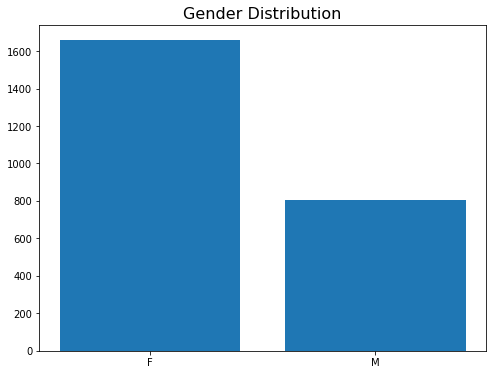

In [4]:
all_sex = np.array(db.session.query(DM.gender).all())
all_sex[all_sex == None] = 'Missing'
keys, counts = np.unique(all_sex, return_counts=True)
plt.figure(figsize = (8,6))
plt.bar(keys,counts)
plt.title("Gender Distribution",fontsize=16)
plt.show()

## Ethnicity Distribution 

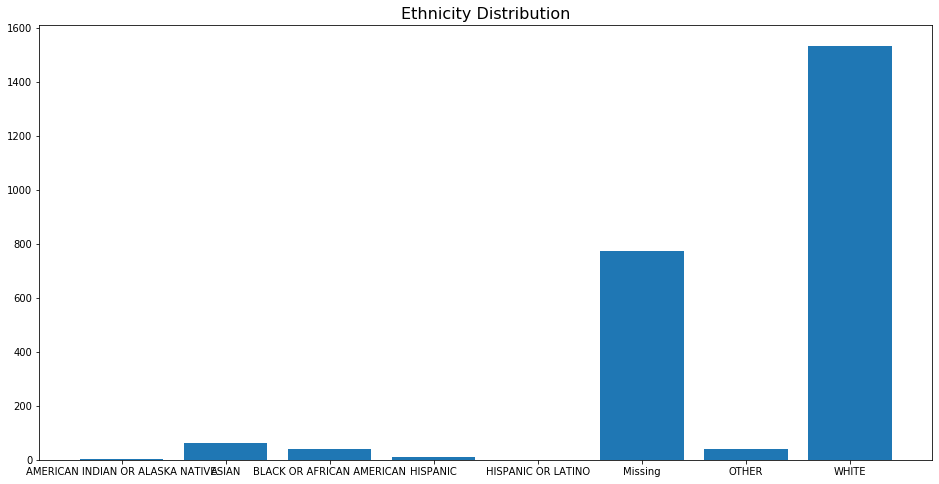

In [5]:
all_race = np.array(db.session.query(DM.race).all())
all_race[all_race == None] = 'Missing'
keys, counts = np.unique(all_race, return_counts=True)
plt.figure(figsize = (16,8))
plt.bar(keys,counts)
plt.title("Ethnicity Distribution",fontsize=16)
plt.show()

## Nationality distribution


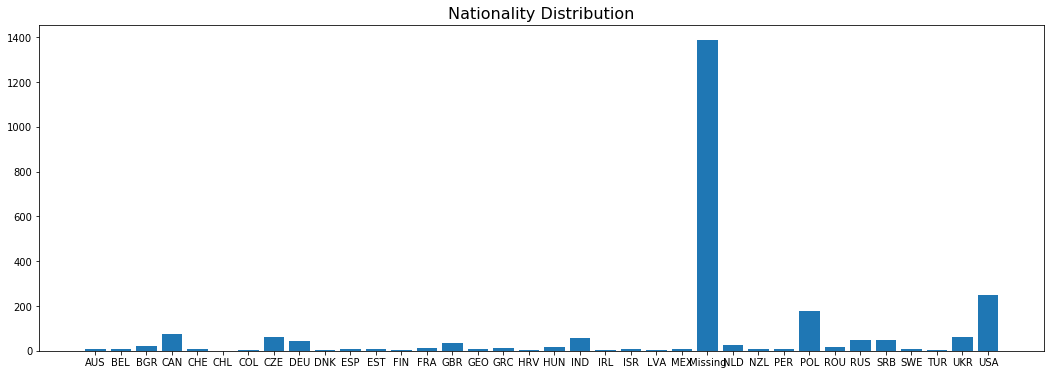

In [6]:
all_country = np.array(db.session.query(DM.country).all())
all_country[all_country == None] = 'Missing'
keys, counts = np.unique(all_country, return_counts=True)
plt.figure(figsize = (18,6))
plt.bar(keys,counts)
plt.title("Nationality Distribution",fontsize=16)
plt.show()

## Age Distribution

Text(0.5, 1.0, 'Age Distribution')

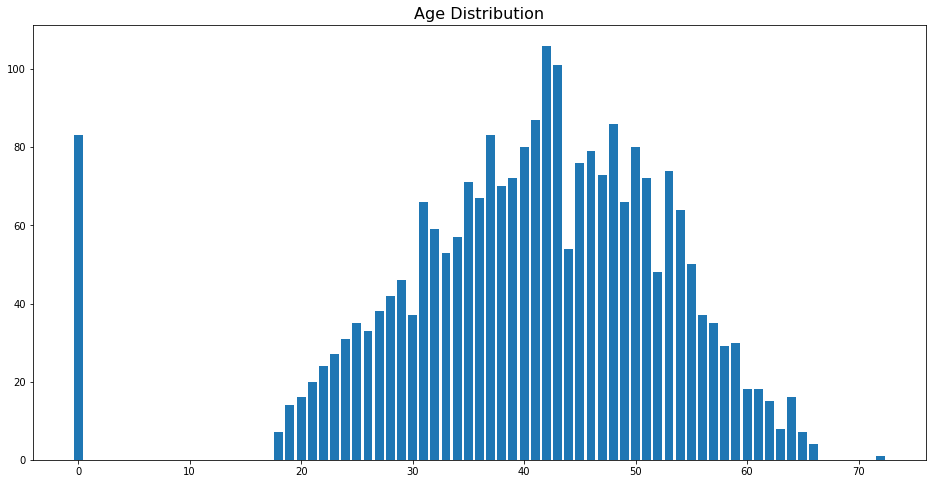

In [7]:
all_age = np.array(db.session.query(DM.age).all())
all_age[all_age == None] = 0 
keys, counts = np.unique(all_age, return_counts=True)
plt.figure(figsize = (16,8))
plt.bar(keys,counts)
plt.title("Age Distribution",fontsize=16)

In [8]:
len(all_age)

2465

In [9]:
all_age = np.array(db.session.query(DM.age).all()).flatten()
all_age[all_age == None] = np.nan
np.nanmean(pd.to_numeric(all_age))
np.nanstd(pd.to_numeric(all_age))




10.411359084088726

## Short Notes Here:
+ There are 2465 patients in total. 
+ The mean age is $41 \pm 10.4$ years old. 
+ Many Nationality and Ethnicity data are missing so may not be useful. 



## Clinical Event (CE) related distrituion

Clinical event records every relpase events from a patient and its duration.


### Confirmed vs Suspected Relapse Event

### Reported Cases

Text(0.5, 1.0, 'Confirmed vs Suspected Relapse Event')

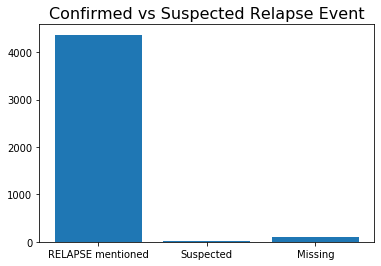

In [11]:
all_reported_cases = np.array(db.session.query(CE.reported_term).all())
all_reported_cases[all_reported_cases == None] = 'Missing'
relapse_list = []
suspected_list = []
missing_list = []
for i,item in enumerate(all_reported_cases):
    if "RELAPSE" in item[0]:
        relapse_list.append(1)
    elif "Suspected" in item[0]:
        suspected_list.append(1)
    else:
        missing_list.append(1)
all_reported_cases_dict = {'RELAPSE mentioned':np.sum(relapse_list),'Suspected':np.sum(suspected_list),'Missing':np.sum(missing_list)}
plt.bar(all_reported_cases_dict.keys(),all_reported_cases_dict.values())
plt.title("Confirmed vs Suspected Relapse Event",fontsize=16)


### Modified Cases

In [12]:
all_cases = np.array(db.session.query(CE.modify_term).all())
all_cases[all_cases == None] = 'Missing'

Text(0.5, 1.0, 'Confirmed vs Suspected Relapse Event')

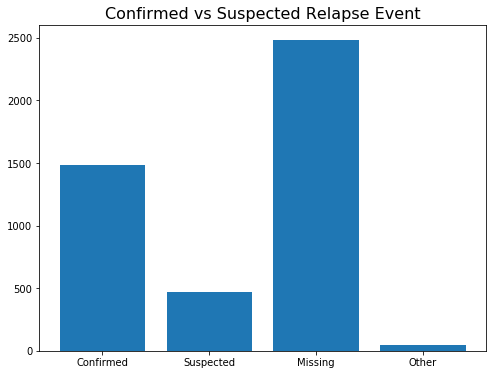

In [13]:
confirmed_list = []
suspected_list = []
other_list = []
missing_list = []
for i,item in enumerate(all_cases):
    if "Confirmed" in item[0]:
        confirmed_list.append(1)
    elif "Suspected" in item[0]:
        suspected_list.append(1)
    elif "Missing" in item[0]:
        missing_list.append(1)
    else:
        other_list.append(1)


all_cases_dict = {'Confirmed':np.sum(confirmed_list),'Suspected':np.sum(suspected_list),'Missing':np.sum(missing_list),'Other':np.sum(other_list)}
plt.figure(figsize = (8,6))
plt.bar(all_cases_dict.keys(),all_cases_dict.values())
plt.title("Confirmed vs Suspected Relapse Event",fontsize=16)

## Any overlap between start day and reported day?

start day, reported day


Text(0.5, 1.0, 'Overlap between start day and reported day')

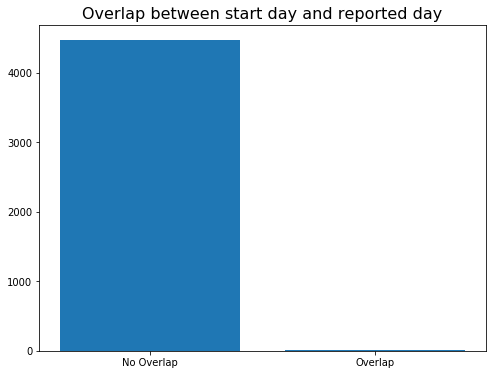

In [14]:
## start day or reported day of the relapse event 
all_start_onset = np.array(db.session.query(CE.start_day).all())
all_onset = np.array(db.session.query(CE.day).all())
all_start_onset[all_start_onset == None] = np.nan
all_onset[all_onset == None] = np.nan
print('start day, reported day')
no_overlap = []
overlap = []

for i in range(len(all_start_onset)):
    if (all_start_onset[i][0] is not np.nan and all_onset[i][0] is not np.nan):
        overlap.append(1)
    else:
        no_overlap.append(1)
all_cases_dict = {'No Overlap':np.sum(no_overlap),'Overlap':np.sum(overlap)}
plt.figure(figsize = (8,6))
plt.bar(all_cases_dict.keys(),all_cases_dict.values())
plt.title("Overlap between start day and reported day",fontsize=16)

In [15]:
## start day or reported day of the relapse event 
all_start_onset = np.array(db.session.query(CE.start_day).all())
all_onset = np.array(db.session.query(CE.day).all())
all_start_onset[all_start_onset == None] = np.nan
all_onset[all_onset == None] = np.nan
print('start day, reported day')
for i in range(len(all_start_onset)):
    if (all_start_onset[i][0] is not np.nan and all_onset[i][0] is not np.nan):
        print(all_start_onset[i],all_onset[i])

start day, reported day
[22] [64]
[79] [85]
[90] [176]
[146] [159]
[270] [296]
[314] [320]
[332] [365]
[416] [512]
[438] [482]
[447] [456]
[519] [520]
[559] [581]
[569] [587]
[953] [970]
[200] [205]
[245] [251]
[655] [659]


In [17]:
len(all_start_onset)

4487

## Distribution of relapse event per patient

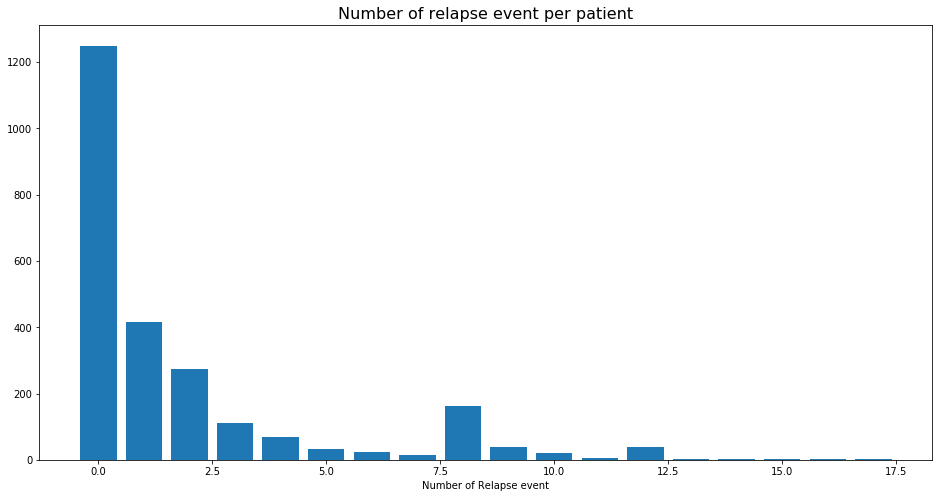

In [19]:
all_patients = db.session.query(DM).all()
number_of_relapse = []
for patients in all_patients:
    number_of_relapse.append(len(patients.clinical_event))
plt.figure(figsize=(16,8))

keys, counts = np.unique(number_of_relapse, return_counts=True)
plt.bar(keys,counts)
plt.title("Number of relapse event per patient",fontsize=16)
plt.xlabel("Number of Relapse event")
plt.show()

### ...removing the 0 occurence

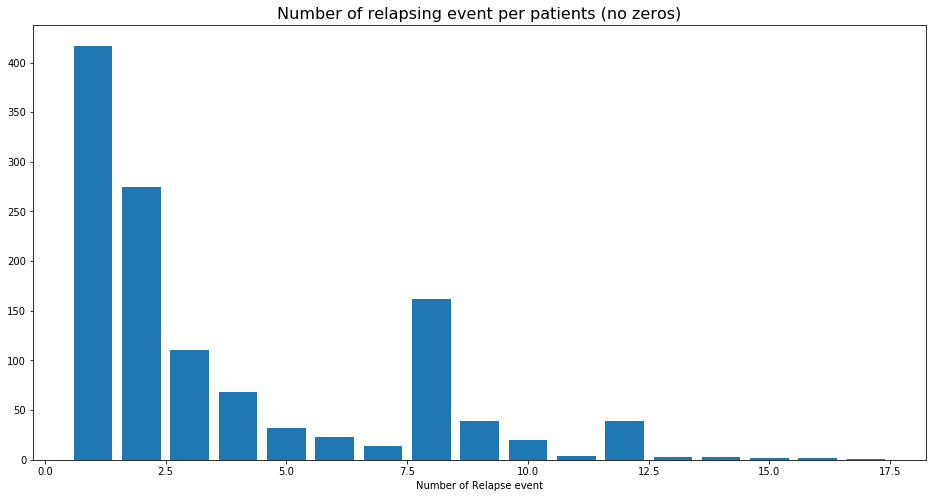

In [20]:
number_of_relapse = np.array(number_of_relapse)
non_zero_relapse = number_of_relapse[number_of_relapse != 0]
plt.figure(figsize=(16,8))
keys, counts = np.unique(non_zero_relapse, return_counts=True)
plt.bar(keys,counts)
plt.title("Number of relapsing event per patients (no zeros)",fontsize=16)
plt.xlabel("Number of Relapse event")

plt.show()

### Short Notes Here

In [21]:
print(f"For a total of {len(all_patients)} patients, there are {len(non_zero_relapse)} patients with non-zero relapse event.")
print(f"There are {len(all_patients) - len(non_zero_relapse)} patients with zeros relapse event throughout their observation period.")


For a total of 2465 patients, there are 1215 patients with non-zero relapse event.
There are 1250 patients with zeros relapse event throughout their observation period.


## Distribution of duration between each relapse events 

In [22]:
all_patients = db.session.query(DM.patient_id).all()
duration_of_relapse = []
relapse_patient_list = []
non_relapse_list = []
for patients in all_patients:
    init_record = np.array(CE.query.with_entities(CE.day).filter_by(patient_id = patients[0]).all()).flatten()
    if len(init_record) != 0:
        relapse_patient_list.append(patients[0])
        if None in init_record:
            init_record[init_record == None] = 0
            sec_record = np.array(CE.query.with_entities(CE.start_day).filter_by(patient_id = patients[0]).all()).flatten()
            
            sec_record[sec_record == None] = 0
            ordered_record = np.sort(np.maximum(init_record,sec_record))
        else:
            ordered_record = np.array(CE.query.with_entities(CE.day).order_by(CE.day).filter_by(patient_id = patients[0]).all()).flatten()

        baseline = 0 
        for record in ordered_record:
            duration_of_relapse.append(record - baseline)
            baseline = record
    else:
        non_relapse_list.append(patients[0])
            
duration_of_relapse = np.array(duration_of_relapse)

No handles with labels found to put in legend.


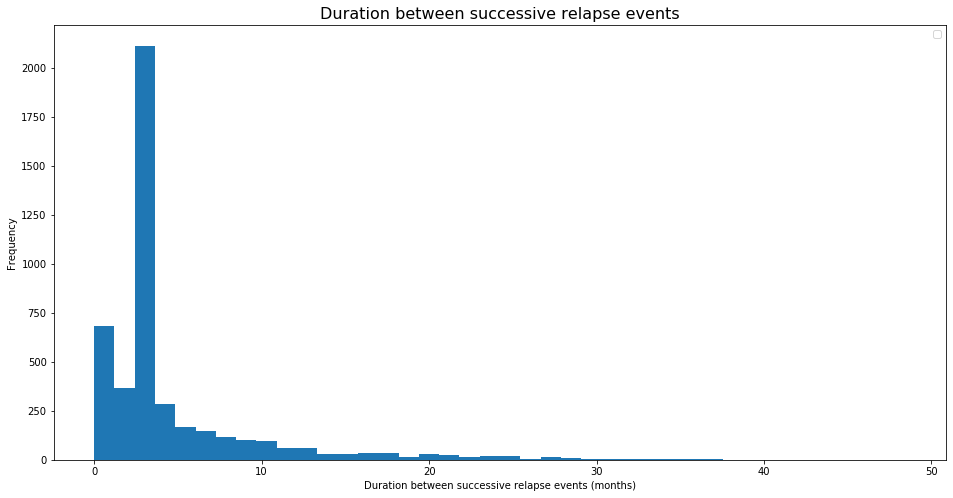

In [23]:
plt.figure(figsize=(16,8))
bin_num = 40
values, bins = np.histogram(duration_of_relapse/30,bins=bin_num)
plt.hist(duration_of_relapse/30,bins=bin_num)
cumsum = np.cumsum(values)
# plt.plot(bins[1:],cumsum,'o-',label = 'Cumulative Sum')
plt.title("Duration between successive relapse events",fontsize=16)
plt.ylabel("Frequency")
plt.xlabel("Duration between successive relapse events (months)")
plt.legend()
plt.show()

### closer look...

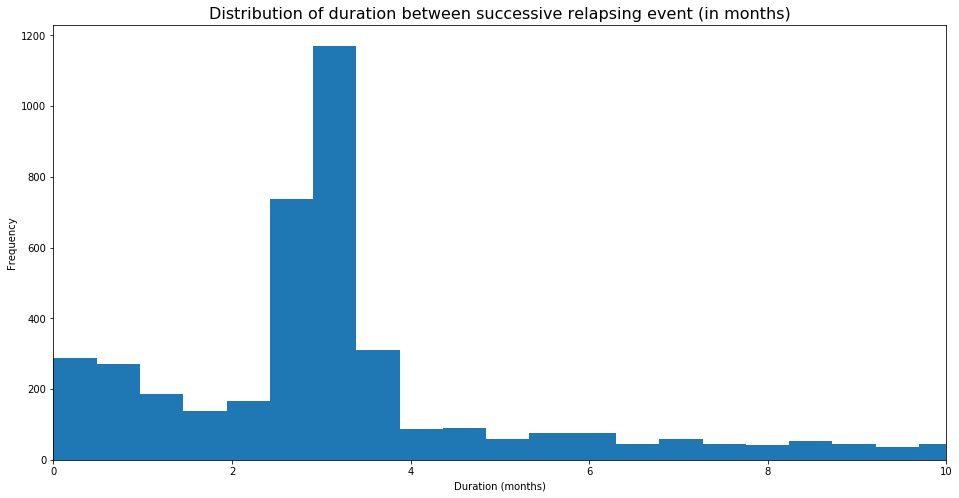

In [24]:
plt.figure(figsize=(16,8))
plt.hist(duration_of_relapse/30,bins=100)
plt.title("Distribution of duration between successive relapsing event (in months)",fontsize=16)
plt.ylabel("Frequency")
plt.xlabel("Duration (months)")
plt.xlim([0,10])
plt.show()

In [25]:
np.sum([duration_of_relapse/30 <3])

1902

In [26]:
np.sum([duration_of_relapse/30>3])

2500

## Age distribution of patients with relapsing event

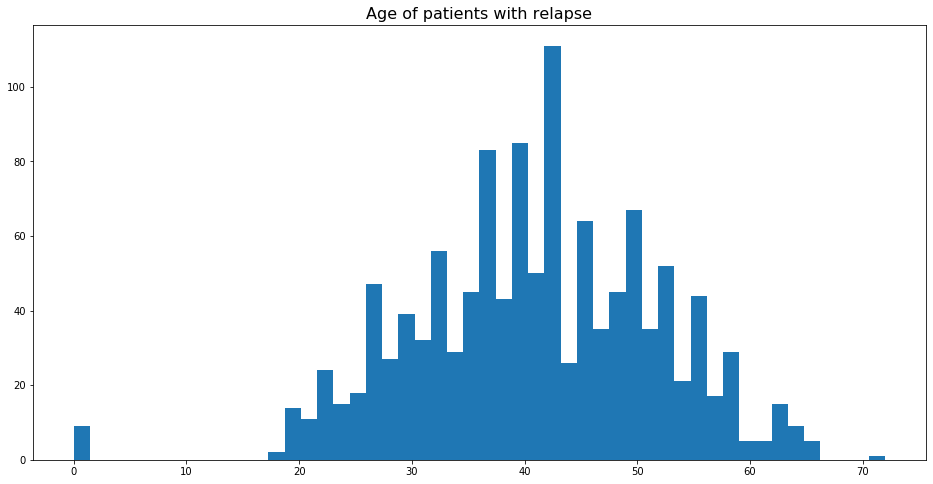

In [27]:
age_of_relapsed_patients = []
for i in relapse_patient_list:
    one_p = DM.query.with_entities(DM.age).filter_by(patient_id = i).first()[0]
    age_of_relapsed_patients.append(one_p)
age_of_relapsed_patients = np.array(age_of_relapsed_patients)
age_of_relapsed_patients[age_of_relapsed_patients == None] = 0
plt.figure(figsize=(16,8))
plt.hist(age_of_relapsed_patients,bins=50)
plt.title("Age of patients with relapse",fontsize=16)
plt.show()

To conlude:
+ 1250 patients does not have any relapse event.
+ We have 4487 relapse events from 1215 patients.
+ Most of the relapsing event are about ~ 90days (3 months) apart from each other. 
+ if we set the threshold to be 3 months, we will have a balanced dataset for the ML training, but many cases will be on the border,i.e. hard to distinguish
+ If we set threshold = 4 months, the ratio (within 4 months: outside 4months) = 3296:1179 ~ 3:1
+ we can easily rebalance the problem by assigning 1250 patients with no relapse history as outside 4months
+ Data drift: We can create an artificial drift by training people under the age of 50


## QS related 

Records of Patient's condition at a specific data/time.

## Distribution of QS test day

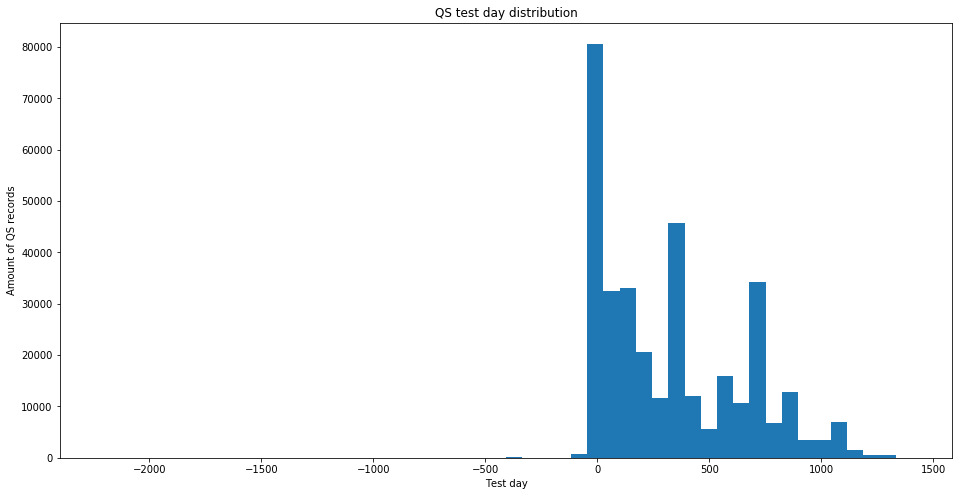

In [28]:
qs_testday = np.array(QS.query.with_entities(QS.test_day).all())
qs_testday[qs_testday == None] = np.nan
plt.figure(figsize=(16,8))
plt.hist(qs_testday,bins=50)
plt.title("QS test day distribution")
plt.xlabel("Test day")
plt.ylabel("Amount of QS records")
plt.show()

## Distribution of QS visit day

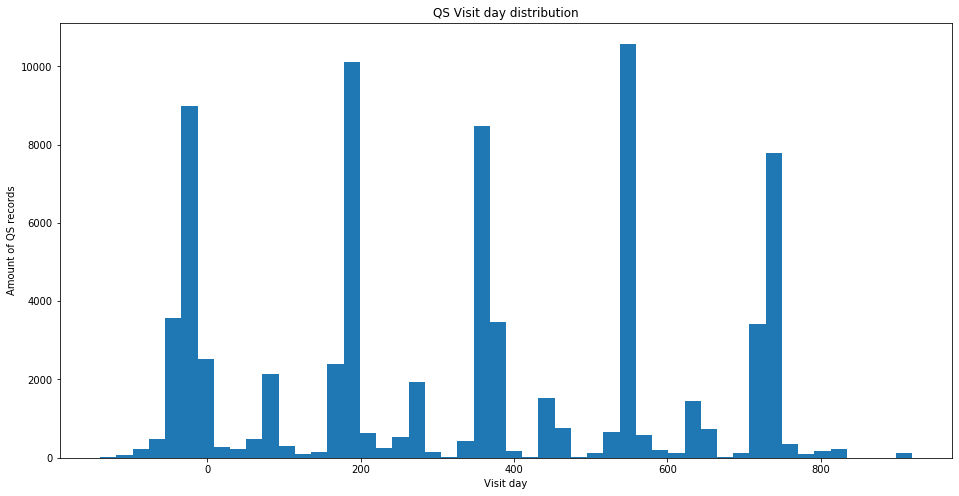

In [29]:
qs_visitday = np.array(QS.query.with_entities(QS.visit_day).all())
qs_visitday[qs_visitday == None] = np.nan
plt.figure(figsize=(16,8))
plt.hist(qs_visitday,bins=50)
plt.title("QS Visit day distribution")
plt.xlabel("Visit day")
plt.ylabel("Amount of QS records")

plt.show()

### Is there any overlapping between QS taken on visit day and QS taken on test day?

Yes, ~10 % of the record is overlapping, but most of them have the same day on test and visit day

## How many KFSS records does each patient w/ relapse have?

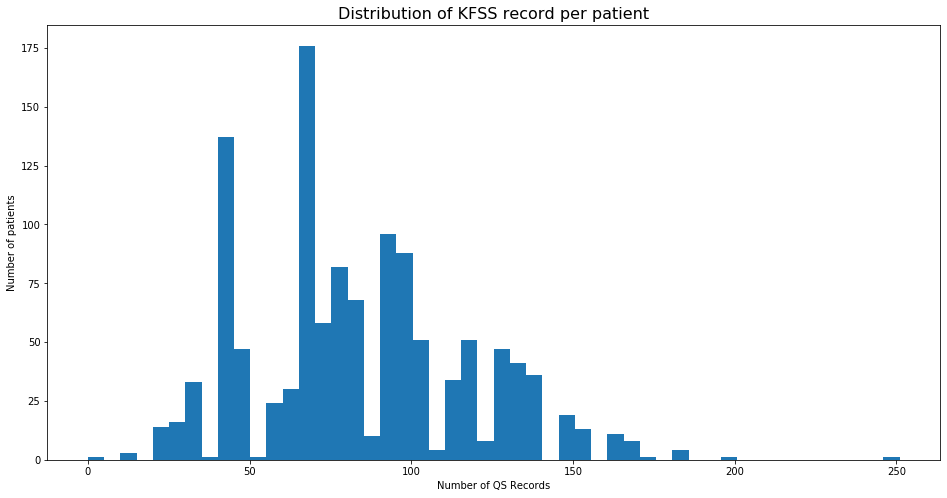

In [30]:
QS_number = []

for i in relapse_patient_list:
    QS_record = QS.query.with_entities(QS.test_category).filter_by(patient_id = i).filter_by(test_category = 'KFSS').all()
    QS_number.append(len(QS_record))
plt.figure(figsize=(16,8))
plt.hist(QS_number,bins=50)
plt.title("Distribution of KFSS record per patient",fontsize=16)
plt.ylabel("Number of patients")
plt.xlabel("Number of QS Records")
plt.show()

## How often are the KFSS scores been recorded, per CE event ?

In [31]:
QS_per_CE_ratio = []
complete_patient_record = []
for i in relapse_patient_list:
    QS_record_visit = QS.query.with_entities(QS.visit_day).filter_by(patient_id = i).filter_by(test_category = 'KFSS').all()
    QS_record_test = QS.query.with_entities(QS.test_day).filter_by(patient_id = i).filter_by(test_category = 'KFSS').all()
    init_record = np.array(CE.query.with_entities(CE.start_day).filter_by(patient_id = i).all()).flatten()
    if (None in np.array(QS_record_visit)) and (None in np.array(QS_record_test)):

#         print(i,"discard")
        continue
    if None in np.array(QS_record_visit):
#         print(i,"none in visit ")
        pass
    else:
        QS_per_CE_ratio.append(len(np.unique(QS_record_visit))/len(init_record))
        complete_patient_record.append(i)
        continue
        
    if None in np.array(QS_record_test):
#         print(i, "none in test ")
        pass
    else:
        QS_per_CE_ratio.append(len(np.unique(QS_record_test))/len(init_record))
        complete_patient_record.append(i)
        continue


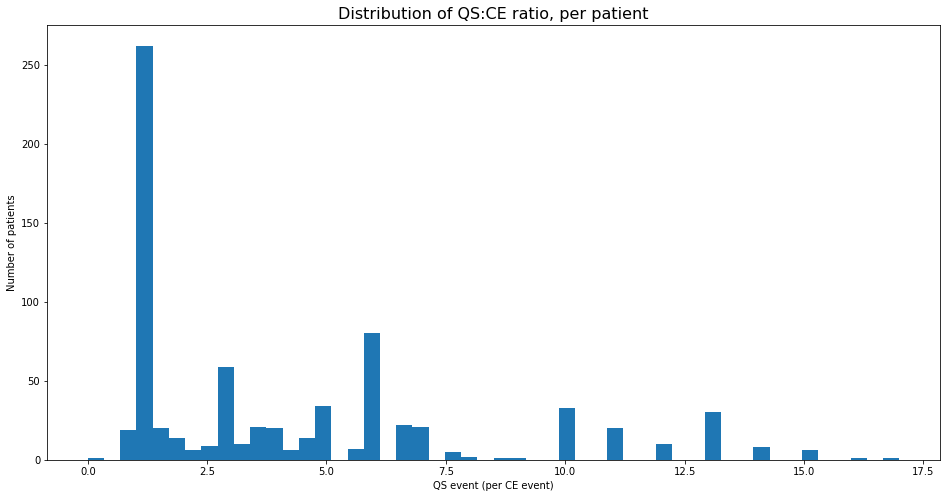

In [32]:
plt.figure(figsize=(16,8))
plt.hist(QS_per_CE_ratio,bins=50)
plt.title("Distribution of QS:CE ratio, per patient",fontsize=16)
plt.ylabel("Number of patients")
plt.xlabel("QS event (per CE event)")
plt.show()

### Patients with well-documented QS records

In [33]:
len(QS_per_CE_ratio)

743

In [34]:
np.mean(QS_per_CE_ratio)

4.343605888850723

### Short notes here

+ There are 743 relapsing patients with well recoreded QS 
+ There are on average 4 QS records per CE events, meaning for every CE events there are 4 QS records at different date/time
+ Since there are more than one QS event per CE, we can use extra QS event to augment the dataset.
+ From CE/patient distribution, we can see that there are ~800 patients with more than one relapse event.



## Data Augmentation

In [35]:
num=0

Text(0.5, 1.0, 'Patient MSOAC/0031 history')

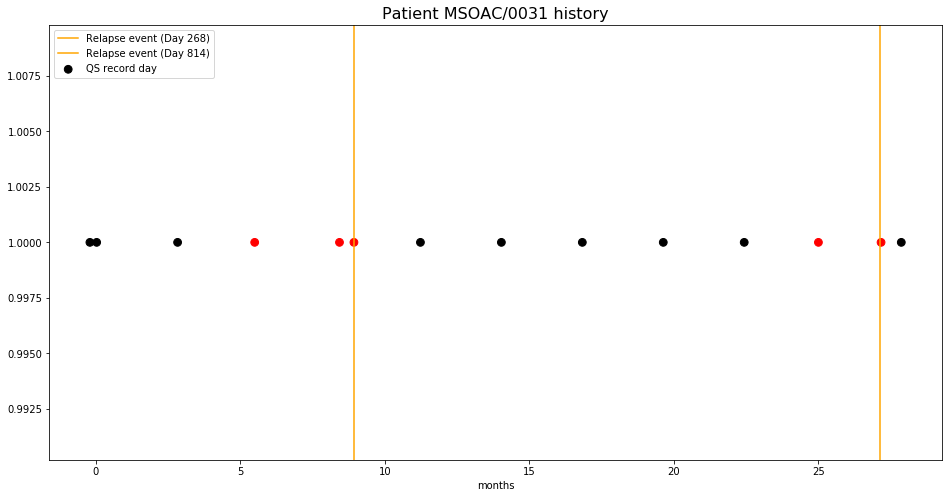

In [36]:
QS_record_visit = QS.query.with_entities(QS.test_day).filter_by(patient_id = complete_patient_record[num]).filter_by(test_category = 'KFSS').all()
QS_record_test = QS.query.with_entities(QS.visit_day).filter_by(patient_id = complete_patient_record[num]).filter_by(test_category = 'KFSS').all()
init_record = np.array(CE.query.with_entities(CE.day).filter_by(patient_id = complete_patient_record[num]).all()).flatten()

if None in init_record:
    init_record[init_record == None] = 0
    sec_record = np.array(CE.query.with_entities(CE.start_day).filter_by(patient_id = complete_patient_record[num]).all()).flatten()

    sec_record[sec_record == None] = 0
    ordered_record = np.sort(np.maximum(init_record,sec_record))
else:
    ordered_record = np.array(CE.query.with_entities(CE.day).order_by(CE.day).filter_by(patient_id = complete_patient_record[num]).all()).flatten()

if None in np.array(QS_record_visit):
    good_QS = QS_record_test
else:
    good_QS = QS_record_visit

plt.figure(figsize=(16,8))
QS_in_m = np.unique(good_QS)/30
CE_in_m = ordered_record/30
color_list = np.array(['k']*len(QS_in_m))

for i in CE_in_m:
    color_list[((i-QS_in_m<4)&(i-QS_in_m>-0.1))] = 'r'

plt.scatter(x=np.unique(good_QS)/30,y=np.ones_like(np.unique(good_QS)),s=60,c=color_list,label = 'QS record day')
for i in ordered_record:
    plt.axvline(x=i/30,color='orange',label=f'Relapse event (Day {i})')
plt.xlabel("months")
plt.legend()
plt.title(f"Patient {complete_patient_record[num]} history",fontsize=16)

## How often are the EDSS scores been recorded, per CE event ?

In [37]:
QS_per_CE_ratio = []
complete_patient_record = []
for i in relapse_patient_list:
    QS_record_visit = QS.query.with_entities(QS.visit_day).filter_by(patient_id = i).filter_by(test_category = 'EDSS').all()
    QS_record_test = QS.query.with_entities(QS.test_day).filter_by(patient_id = i).filter_by(test_category = 'EDSS').all()
    init_record = np.array(CE.query.with_entities(CE.start_day).filter_by(patient_id = i).all()).flatten()
    if (None in np.array(QS_record_visit)) and (None in np.array(QS_record_test)):
#         print(i,"discard")
        continue
    if None in np.array(QS_record_visit):
#         print(i,"none in visit ")
        pass
    else:
        QS_per_CE_ratio.append(len(np.unique(QS_record_visit))/len(init_record))
        complete_patient_record.append(i)
        continue
        
    if None in np.array(QS_record_test):
#         print(i, "none in test ")
        pass
    else:
        QS_per_CE_ratio.append(len(np.unique(QS_record_test))/len(init_record))
        complete_patient_record.append(i)
        continue



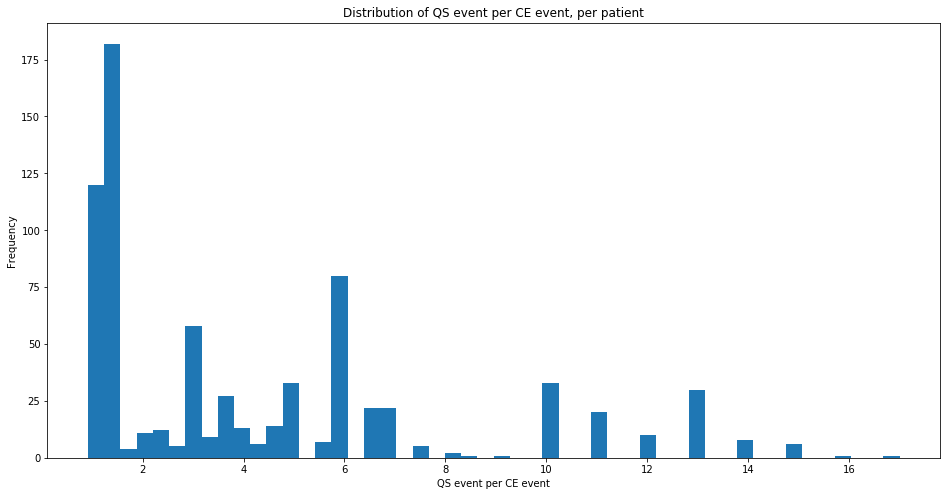

In [38]:
plt.figure(figsize=(16,8))
plt.hist(QS_per_CE_ratio,bins=50)
plt.title("Distribution of QS event per CE event, per patient")
plt.ylabel("Frequency")
plt.xlabel("QS event per CE event")
plt.show()

In [39]:
target_list = []
for i in complete_patient_record:
    QS_record_visit = QS.query.with_entities(QS.test_day).filter_by(patient_id = i).filter_by(test_category = 'KFSS').all()
    QS_record_test = QS.query.with_entities(QS.visit_day).filter_by(patient_id = i).filter_by(test_category = 'KFSS').all()
    init_record = np.array(CE.query.with_entities(CE.day).filter_by(patient_id = i).all()).flatten()

    if None in init_record:
        init_record[init_record == None] = 0
        sec_record = np.array(CE.query.with_entities(CE.start_day).filter_by(patient_id = i).all()).flatten()

        sec_record[sec_record == None] = 0
        ordered_record = np.sort(np.maximum(init_record,sec_record))
    else:
        ordered_record = np.array(CE.query.with_entities(CE.day).order_by(CE.day).filter_by(patient_id = i).all()).flatten()

    if None in np.array(QS_record_visit):
        good_QS = QS_record_test
    else:
        good_QS = QS_record_visit

    QS_in_m = np.unique(good_QS)/30
    CE_in_m = ordered_record/30
    negative_list = np.array([0]*len(QS_in_m))

    for i in CE_in_m:
        negative_list[((i-QS_in_m<4)&(i-QS_in_m>-0.1))] = 1
    target_list.append(np.array(negative_list).flatten())


In [40]:
flat_list = [item for sublist in target_list for item in sublist]
np.sum(flat_list)

4365

# To Summarise our data exploration:


## Our Objective:
+ To build a naive model that :
    + predicts whether a patient will have a relapse event in n months time, given his/her health record on a particular day.
    + predicts whether a patient will have a relapse event in the future, given his/her health record on a particular day.
    
## Approach:
We defined a relapse event happened to a patient when there has been a record in the Clinical Event, regardless of whether it is suspected or not. 

\begin{align}
y_t = \begin{cases}
    0       & \quad \text{if relapse event happens outside } n \text{ months time}\\
    1  & \quad \text{if relapse event happens within } n \text{ months time}
  \end{cases}
\end{align}

The corresponding prediction, $\hat{y_t} = [0,1]$, from a ML model $\Theta$, is generated using the patient's health record at time $t$, $x_t$, i.e.

\begin{align}
 \hat{y_t} = \Theta(x_t)
\end{align}

In our case, $x_t$ represnts the patient's background, $B$, and the patient's KFSS score at that time $t$, $K_t = \{k_1,k_2... k_n\} $, thus:

\begin{align}
 \hat{y_t} = \Theta(B,K_t)
\end{align}

As this is a supervised classification task, we plan to use cross entopy as our loss function $\mathcal{L}$.

\begin{align}
\mathcal{L}= -( y_t log(\hat{y_t})+(1 - y_t ) log (1-\hat{y_t})
\end{align}

This is only one way of utilising the data. The purpose of this task is simply to help demostrate the infrastructure of the initial version of the learning machine. 

## Statistics (the case when n =4):

After filtering missing information from 3 different tables, DM, CE and QS. There are in total 743 patients that have non-zero relapse event and have well-documented QS events (dates are not missing), with a total of 3454 CE. 

Since there are multiple QS record per CE event, meaning that we can augment the dataset by treating each QS record as a different case, summing up to approx. 7489 individual cases (datapoints) for our model to learn.

In that case, there are 7489 cases, with 4365 positive cases (happening within 4 months) and 3124 negative cases ( happening after 4 months)

## extra
Medical health record


In [86]:
all_patients = np.array(DM.query.with_entities(DM.patient_id).all())


In [ ]:
for i in all_patients:
    MH_record = MH.query.with_entities(MH.category).filter_by(patient_id = i[0])


In [67]:
MHCAT = np.array(MH.query.with_entities(MH.category).all())
MHSCAT = np.array(MH.query.with_entities(MH.sub_category).all())
MHTERM = np.array(MH.query.with_entities(MH.term).all())
decode = np.array(MH.query.with_entities(MH.decode).all())

In [62]:
# For all patients

Text(0.5, 1.0, 'Medical Health Category Distribution')

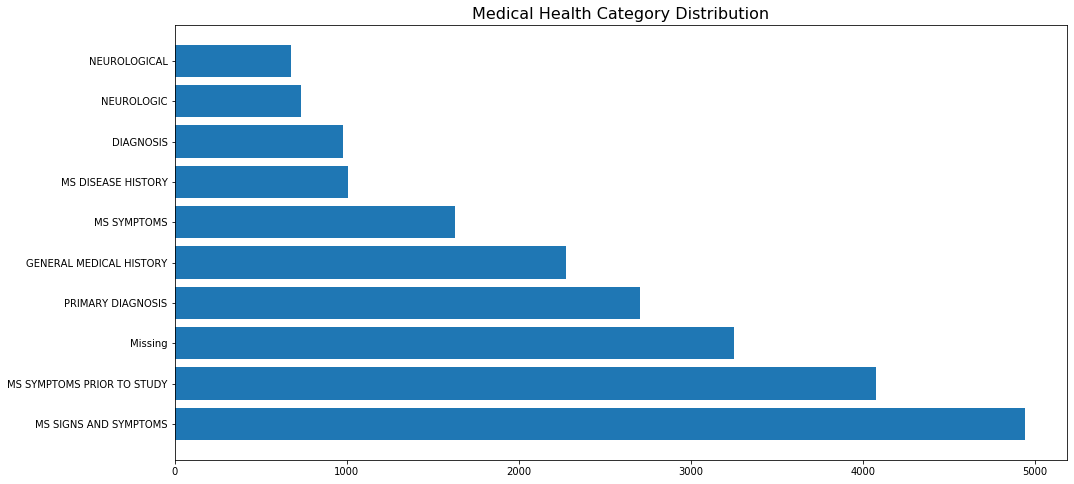

In [74]:
MHCAT[MHCAT == None] = 'Missing'
keys, counts = np.unique(MHCAT, return_counts=True)
keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]

plt.figure(figsize = (16,8))
plt.barh(keys[:10],counts[:10])
plt.title("Medical Health Category Distribution (Top 10)",fontsize=16)

Text(0.5, 1.0, 'Medical Health Sub Category Distribution (Top 10)')

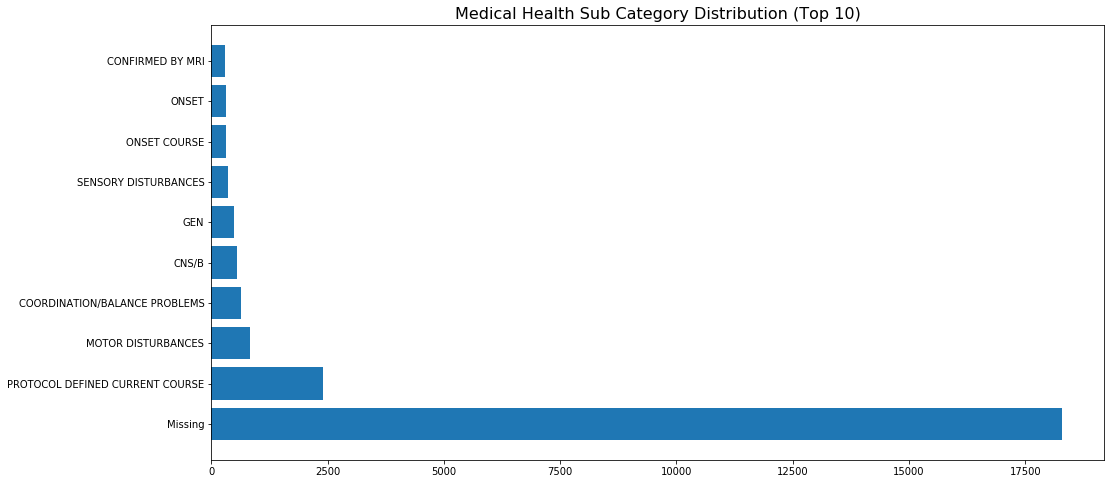

In [73]:
MHSCAT[MHSCAT == None] = 'Missing'
keys, counts = np.unique(MHSCAT, return_counts=True)
keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]

plt.figure(figsize = (16,8))
plt.barh(keys[:10],counts[:10])
plt.title("Medical Health Sub Category Distribution (Top 10)",fontsize=16)

Text(0.5, 1.0, 'Medical Health Decode Distribution')

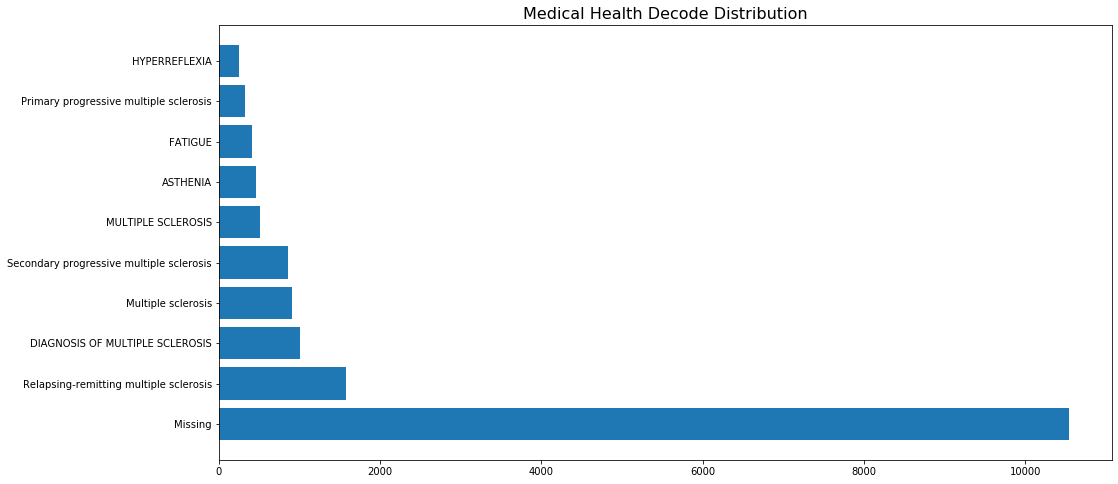

In [75]:
decode[decode == None] = 'Missing'
keys, counts = np.unique(decode, return_counts=True)
keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]
plt.figure(figsize = (16,8))
plt.barh(keys[:10],counts[:10])
plt.title("Medical Health Decode Distribution",fontsize=16)

26252

Text(0.5, 1.0, 'Medical Health Term Distribution')

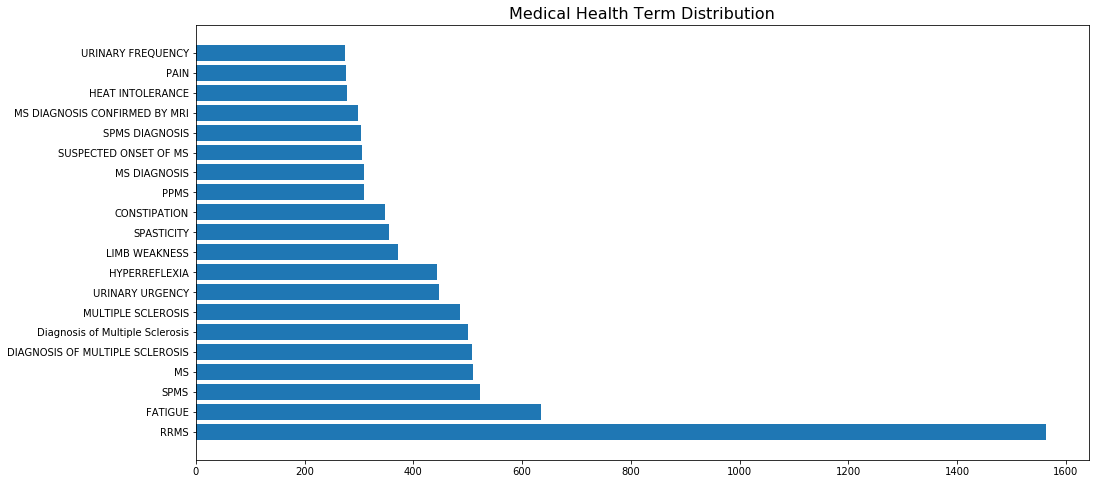

In [77]:
MHTERM[MHTERM == None] = 'Missing'
keys, counts = np.unique(MHTERM, return_counts=True)
keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]
plt.figure(figsize = (16,8))
plt.barh(keys[:20],counts[:20])
plt.title("Medical Health Term Distribution",fontsize=16)

26252

## For relapse patient only

In [81]:
relapse_freq = []
for i in relapse_patient_list:
    mhterm = np.array(MH.query.with_entities(MH.term).filter_by(patient_id = i).all())
    relapse_freq.append(mhterm.flatten())
    

In [82]:
relapse_freq_list = np.array([item for sublist in relapse_freq for item in sublist])



Text(0.5, 1.0, 'Medical Health Term Distribution')

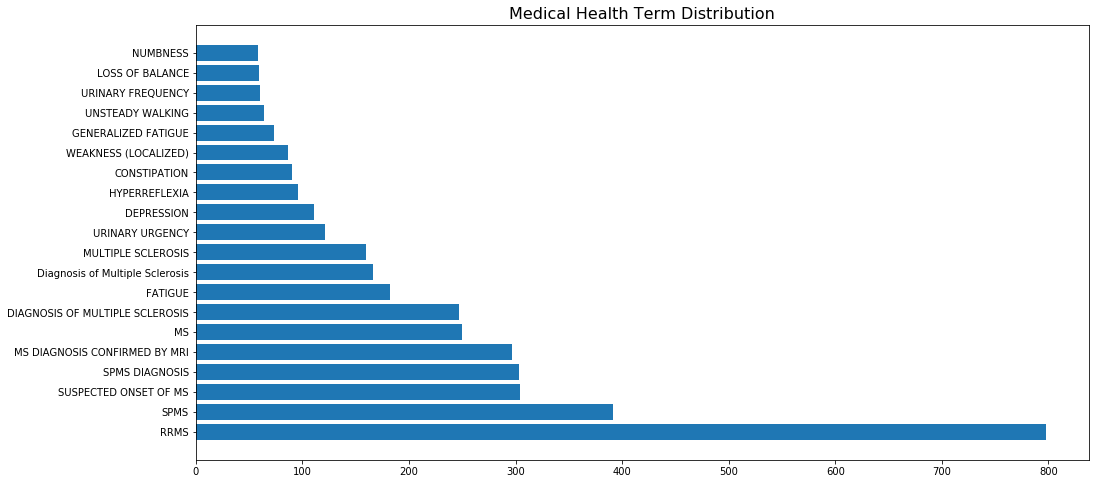

In [83]:
relapse_freq_list[relapse_freq_list == None] = 'Missing'
keys, counts = np.unique(relapse_freq_list, return_counts=True)
keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]
plt.figure(figsize = (16,8))
plt.barh(keys[:20],counts[:20])
plt.title("Medical Health Term Distribution",fontsize=16)

In [61]:
len(relapse_patient_list)

1215

In [118]:
## relapse patient, and with RRMS only!!

SPMS 391


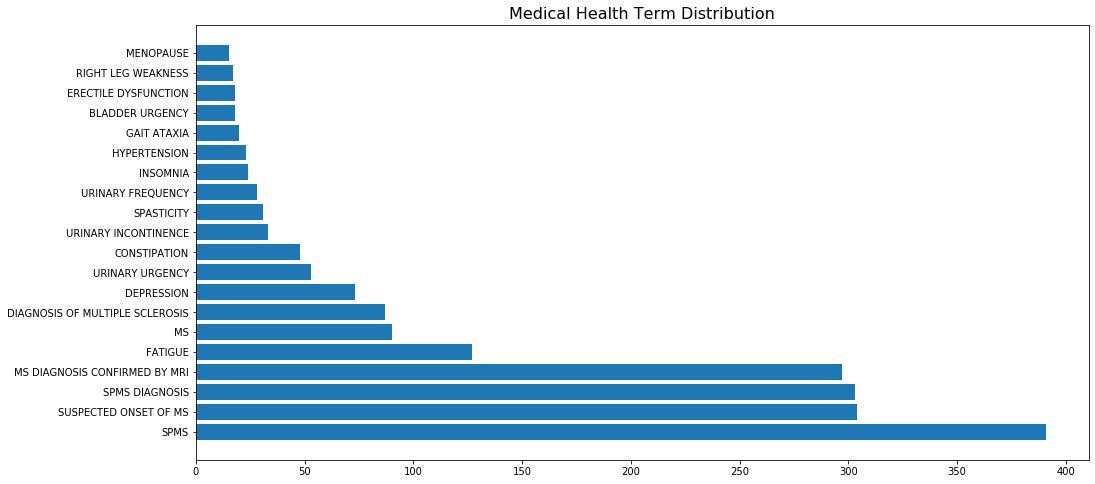

In [124]:
RRMS_mentioned_patient = []
for i in relapse_patient_list:
    mhterm = np.array(MH.query.with_entities(MH.term).filter_by(patient_id = i).all()).flatten()
    if 'SPMS' in mhterm:
        RRMS_mentioned_patient.append(mhterm)
RRMS_mentioned_patient_list = np.array([item for sublist in RRMS_mentioned_patient for item in sublist])
RRMS_mentioned_patient_list[RRMS_mentioned_patient_list == None] = 'Missing'
keys, counts = np.unique(RRMS_mentioned_patient_list, return_counts=True)

keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]
plt.figure(figsize = (16,8))
plt.barh(keys[:20],counts[:20])
plt.title("Medical Health Term Distribution",fontsize=16)
print(keys[0],counts[0])
    

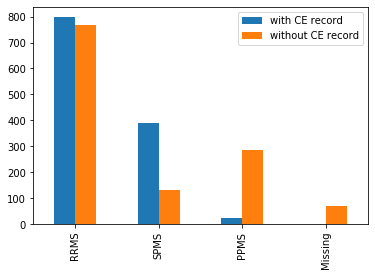

In [199]:

RRMS_mentioned_patient = []
SPMS_mentioned_patient = []
PPMS_mentioned_patient = []
missing = []
for i in no_relapse_record_patient:
    mhterm = np.array(MH.query.with_entities(MH.term).filter_by(patient_id = i).all()).flatten()
    if 'RRMS' in mhterm:
        RRMS_mentioned_patient.append(1)
    elif 'SPMS' in mhterm:
        SPMS_mentioned_patient.append(1)
    elif 'PPMS' in mhterm:
        PPMS_mentioned_patient.append(1)
    else:
        missing.append(1)
RRMS_mentioned_patient_r = []
SPMS_mentioned_patient_r = []
PPMS_mentioned_patient_r = []
missing_r = []
for i in relapse_patient_list:
    mhterm = np.array(MH.query.with_entities(MH.term).filter_by(patient_id = i).all()).flatten()
    if 'RRMS' in mhterm:
        RRMS_mentioned_patient_r.append(1)
    elif 'SPMS' in mhterm:
        SPMS_mentioned_patient_r.append(1)
    elif 'PPMS' in mhterm:
        PPMS_mentioned_patient_r.append(1)
    else:
        missing_r.append(1)
import pandas as pd
r_cases_dict = {'RRMS':np.sum(RRMS_mentioned_patient_r),'SPMS':np.sum(SPMS_mentioned_patient_r),'PPMS':np.sum(PPMS_mentioned_patient_r),'Missing':np.sum(missing_r)}
no_r_cases_dict = {'RRMS':np.sum(RRMS_mentioned_patient),'SPMS':np.sum(SPMS_mentioned_patient),'PPMS':np.sum(PPMS_mentioned_patient),'Missing':np.sum(missing)}


df = pd.DataFrame.from_dict(r_cases_dict,orient='index')
df2 = pd.DataFrame.from_dict(no_r_cases_dict,orient='index')
df["without CE record"] = pd.Series(no_r_cases_dict)
df = df.rename(columns={0: "with CE record"})
df.plot.bar()

        



## For patient w/o relapse event recorded

In [103]:
mask = np.isin(all_patients, relapse_patient_list, invert=True)

In [105]:
no_relapse_record_patient = all_patients[mask]

Text(0.5, 1.0, 'Medical Health Term Distribution (no recorded relapse)')

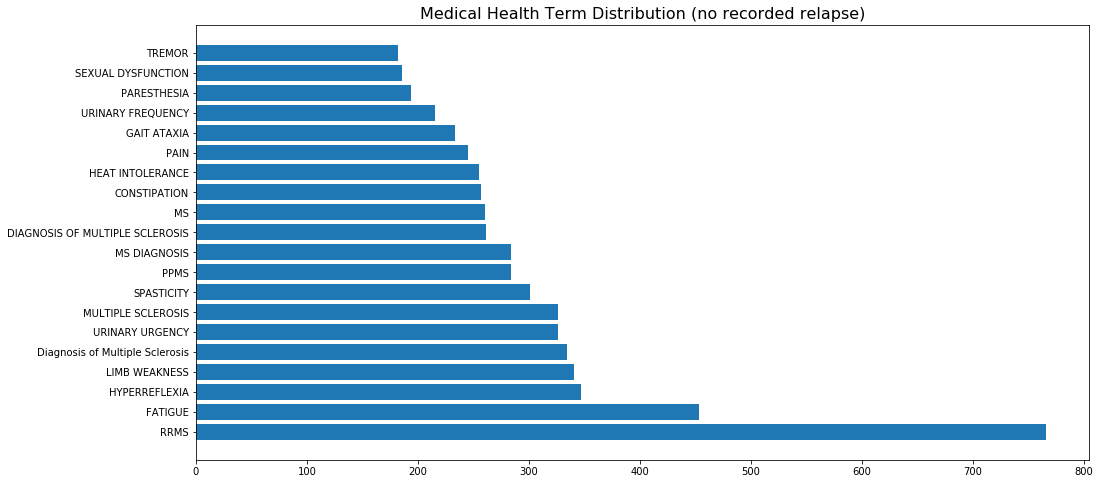

In [110]:
no_relapse_freq = []
for i in no_relapse_record_patient:
    mhterm = np.array(MH.query.with_entities(MH.term).filter_by(patient_id = i).all())
    no_relapse_freq.append(mhterm.flatten())
no_relapse_freq_list = np.array([item for sublist in no_relapse_freq for item in sublist])
no_relapse_freq_list[no_relapse_freq_list == None] = 'Missing'
keys, counts = np.unique(no_relapse_freq_list, return_counts=True)
keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]
plt.figure(figsize = (16,8))
plt.barh(keys[:20],counts[:20])
plt.title("Medical Health Term Distribution (no recorded relapse)",fontsize=16)


In [ ]:
## no relapse record patient, and with RRMS only!!

RRMS 766


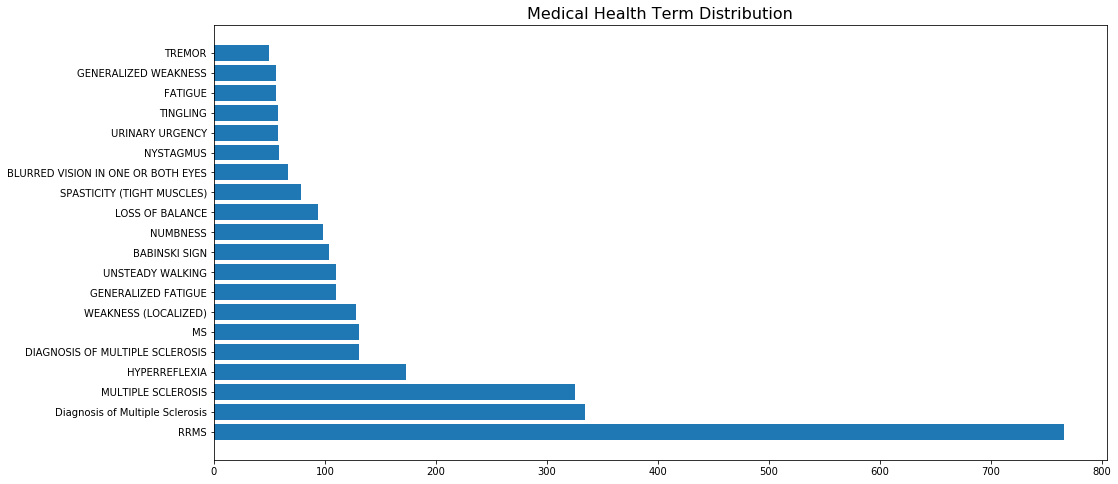

In [134]:
RRMS_mentioned_patient = []
RRMS_no_r_patient = []
for i in no_relapse_record_patient:
    mhterm = np.array(MH.query.with_entities(MH.term).filter_by(patient_id = i).all()).flatten()
    if 'RRMS' in mhterm:
        RRMS_mentioned_patient.append(mhterm)
        RRMS_no_r_patient.append(i)
RRMS_mentioned_patient_list = np.array([item for sublist in RRMS_mentioned_patient for item in sublist])
RRMS_mentioned_patient_list[RRMS_mentioned_patient_list == None] = 'Missing'
keys, counts = np.unique(RRMS_mentioned_patient_list, return_counts=True)

keys = keys[counts.argsort()][::-1]
counts = counts[counts.argsort()][::-1]
plt.figure(figsize = (16,8))
plt.barh(keys[:20],counts[:20])
plt.title("Medical Health Term Distribution",fontsize=16)
print(keys[0],counts[0])

In [142]:
for i in RRMS_no_r_patient:
    one_patients = db.session.query(DM).filter_by(patient_id = i).all()
    print(one_patients[0].clinical_event)
# number_of_relapse = []
# for patients in all_patients:
#     number_of_relapse.append(len(patients.clinical_event))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[